In [1]:
import numpy as np
import pandas as pd 
import geopandas
import geopy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/all_features_with_logs.csv', index_col = 'Unnamed: 0')

### Relooking at data with revised park data
removing natural areas, trail heads, aquatic centers and open spaces from the dataset

In [3]:
data['log_park_rv'] = np.log(data['min_dist_park_rv'])

In [4]:
#some park distances are infinite floats - remove
data = data.replace([np.inf, -np.inf, -0], 0)

In [5]:
x_cols = ['sqft_living','grade','log_park_rv',
       'log_school', 'log_coffee', 'log_scientology']
y = ['price']
columns = data.columns

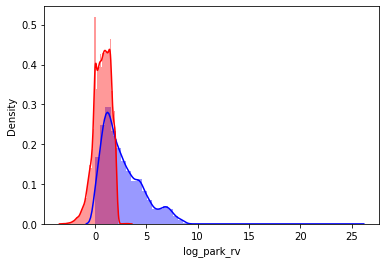

In [6]:
#Look at the difference between log transformed feature and original

sns.distplot(data['min_dist_park_rv'],color='blue');
sns.distplot(data['log_park_rv'],color='red');

In [7]:
#is the updated park list more correllative? 

data['price'].corr(data['log_park_rv'])

0.2232573961274352

In [8]:
#filter sqft_living 
sqft_living_filtered = data['sqft_living'] < data['sqft_living'].quantile(.95)
data = data[sqft_living_filtered]

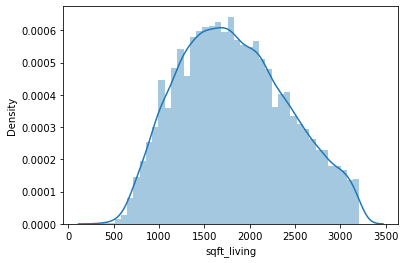

In [9]:
sns.distplot(data['sqft_living']);

### Start modeling!

In [10]:
f = 'price ~ sqft_living'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     5320.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:23   Log-Likelihood:            -2.0847e+05
No. Observations:               15650   AIC:                         4.169e+05
Df Residuals:                   15648   BIC:                         4.170e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.804e+05   3817.100     47.248      0.000    1.73e+05    1.88e+05
sqft_living   144.7376      1.984     72.940      0.000     140.848     148.627
==============================================================================
Omnibus:                      564.410   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.431
Skew:                           0.461   Prob(JB):                    6.84e-131
Kurtosis:                       2.736   Cond. No.                     6.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
f = 'price ~ sqft_living + log_school + grade'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     6068.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:23   Log-Likelihood:            -2.0472e+05
No. Observations:               15650   AIC:                         4.095e+05
Df Residuals:                   15646   BIC:                         4.095e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.438e+05   8223.215    -17.488      0.000    -1.6e+05   -1.28e+05
sqft_living    98.4727      2.037     48.335      0.000      94.479     102.466
log_school  -6.251e+04    736.243    -84.901      0.000    -6.4e+04   -6.11e+04
grade        5.875e+04   1362.958     43.103      0.000    5.61e+04    6.14e+04
==============================================================================
Omnibus:                     1014.613   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.632
Skew:                           0.583   Prob(JB):                    8.64e-299
Kurtosis:                       3.863   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
f = 'price ~ sqft_living + log_school + grade + log_park_rv + log_scientology'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4807.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:23   Log-Likelihood:            -2.0348e+05
No. Observations:               15650   AIC:                         4.070e+05
Df Residuals:                   15644   BIC:                         4.070e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.924e+04   8565.526     -4.581      0.000    -5.6e+04   -2.25e+04
sqft_living       110.4234      1.896     58.245      0.000     106.707     114.139
log_school      -3.866e+04    878.799    -43.989      0.000   -4.04e+04   -3.69e+04
grade            5.823e+04   1261.702     46.155      0.000    5.58e+04    6.07e+04
log_park_rv      2.641e+04   1180.169     22.374      0.000    2.41e+04    2.87e+04
log_scientology -5.665e+04   1690.960    -33.499      0.000      -6e+04   -5.33e+04
==============================================================================
Omnibus:                      815.253   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.541
Skew:                           0.472   Prob(JB):                    8.16e-259
Kurtosis:                       3.966   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Log transformation didn't work with our data - trying using quant instead

In [13]:
#copy df 
data_quant = data.copy()

In [14]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['sqft_living', 'closest_distance_to_great_coffee', 
               'min_dist_park_rv', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'price']
data_quant[to_transform] = qt.fit_transform(data_quant[to_transform])

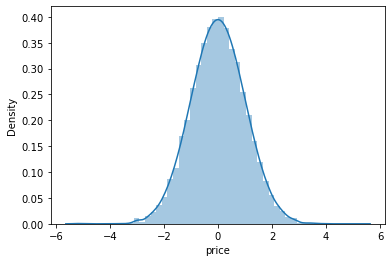

In [15]:
#look at the new distributions
sns.distplot(data_quant['price']);

### Modeling with quant transformed features

In [16]:
f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5062.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:24   Log-Likelihood:                -14704.
No. Observations:               15650   AIC:                         2.942e+04
Df Residuals:                   15644   BIC:                         2.947e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.5918      0.059    -26.920      0.000      -1.708      -1.476
sqft_living         0.3832      0.006     59.122      0.000       0.371       0.396
grade               0.3370      0.007     46.204      0.000       0.323       0.351
log_school         -0.2499      0.005    -49.245      0.000      -0.260      -0.240
log_park_rv         0.1309      0.007     19.219      0.000       0.118       0.144
log_scientology    -0.3344      0.010    -34.253      0.000      -0.354      -0.315
==============================================================================
Omnibus:                      715.270   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2381.655
Skew:                           0.108   Prob(JB):                         0.00
Kurtosis:                       4.899   Cond. No.                         96.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Filter down price and see how it impacts our models

In [17]:
filtered_price = data['price'].between(300000,800000)
filtered_data = data[filtered_price]
filtered_data.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,log_school,log_coffee,log_scientology,log_park,min_dist_park_rv,log_park_rv
1,538000,2570,7,47.7210,-122.319,5.052058,0.682377,14.813168,10.800338,-0.382173,2.695517,2.379577,1.619796,3.52051,1.258606
3,604000,1960,7,47.5208,-122.393,2.448557,1.729431,14.476522,11.547177,0.547792,2.672528,2.446441,0.895499,1.52156,0.419736
4,510000,1680,8,47.6168,-122.045,2.672832,1.179255,8.214909,21.182016,0.164882,2.105951,3.053153,0.983138,2.31352,0.838770
9,323000,1890,7,47.3684,-122.031,5.146491,0.847291,16.300571,35.338388,-0.165711,2.791200,3.564970,1.638315,2.00144,0.693867
11,468000,1160,7,47.6900,-122.292,3.230678,0.598800,10.906520,8.748762,-0.512827,2.389361,2.168912,1.172692,3.43172,1.233062


In [18]:
f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = filtered_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1642.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:24   Log-Likelihood:            -1.4822e+05
No. Observations:               11458   AIC:                         2.964e+05
Df Residuals:                   11452   BIC:                         2.965e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.357e+04   9573.856      5.596      0.000    3.48e+04    7.23e+04
sqft_living        86.0662      2.069     41.604      0.000      82.011      90.121
grade            4.745e+04   1374.384     34.528      0.000    4.48e+04    5.01e+04
log_school       -3.12e+04   1016.848    -30.678      0.000   -3.32e+04   -2.92e+04
log_park_rv      2.488e+04   1357.327     18.331      0.000    2.22e+04    2.75e+04
log_scientology -4.003e+04   1830.926    -21.863      0.000   -4.36e+04   -3.64e+04
==============================================================================
Omnibus:                      237.765   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.829
Skew:                           0.346   Prob(JB):                     4.62e-56
Kurtosis:                       3.237   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
filtered_price = data['price'].between(300000,700000)
filtered_data1 = data[filtered_price]

f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = filtered_data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:24   Log-Likelihood:            -1.3457e+05
No. Observations:               10505   AIC:                         2.692e+05
Df Residuals:                   10499   BIC:                         2.692e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.16e+05   9136.774     12.692      0.000    9.81e+04    1.34e+05
sqft_living        67.4988      1.930     34.970      0.000      63.715      71.282
grade            3.893e+04   1305.225     29.824      0.000    3.64e+04    4.15e+04
log_school      -2.772e+04    932.097    -29.743      0.000   -2.96e+04   -2.59e+04
log_park_rv       2.05e+04   1232.024     16.643      0.000    1.81e+04    2.29e+04
log_scientology -3.054e+04   1694.590    -18.020      0.000   -3.39e+04   -2.72e+04
==============================================================================
Omnibus:                      116.895   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.745
Skew:                           0.255   Prob(JB):                     9.95e-27
Kurtosis:                       2.887   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
for col in x_cols: 
    print(col)
    print('Skew: ', filtered_data[col].skew())
    print('Kurtosis: ', filtered_data[col].kurt())
    print('Correlation with price: ', filtered_data['price'].corr(filtered_data[col]))
    print(" ")

sqft_living
Skew:  0.11343818301036654
Kurtosis:  -0.7044944718537267
Correlation with price:  0.3711638589482517
 
grade
Skew:  0.39712256592914214
Kurtosis:  0.5992980578544511
Correlation with price:  0.4044322744845937
 
log_park_rv
Skew:  -0.5439328165685128
Kurtosis:  0.12759454828893313
Correlation with price:  0.2252178518120249
 
log_school
Skew:  0.44180589457925706
Kurtosis:  0.2759869349359212
Correlation with price:  -0.26664207881001445
 
log_coffee
Skew:  -1.1911995785045566
Kurtosis:  1.616608964810193
Correlation with price:  -0.14126611717144474
 
log_scientology
Skew:  -0.47179350385556135
Kurtosis:  0.1073792549874466
Correlation with price:  -0.22705896198244707
 


### Importing final dataset to rerun some models and use RFE to double check for insignificant features

In [21]:
final_data = pd.read_csv('data/all_features_ppsqft_quant.csv', index_col = 'Unnamed: 0')

In [22]:
#modeling with statsmodels 

features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'quant_interaction']
target = ['quant_price']
X = final_data[features]
y = final_data[target]

# use train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm10 = LinearRegression().fit(X_train, y_train)
lm10_preds = lm10.predict(X_test)
print('R2: ', r2_score(y_test, lm10_preds))

R2:  0.7559870492262424


In [23]:
#modeling with sk learn

f = 'price ~ quant_sqft_living + quant_coffee + quant_parks + quant_schools + quant_scientology + quant_interaction + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12 + grade_13'
model = ols(formula = f, data = final_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     3391.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:25   Log-Likelihood:            -2.3130e+05
No. Observations:               17495   AIC:                         4.626e+05
Df Residuals:                   17479   BIC:                         4.628e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.136e+05   3.36e+04     15.269      0.000    4.48e+05     5.8e+05
quant_sqft_living  1.169e+05   1519.687     76.953      0.000    1.14e+05     1.2e+05
quant_coffee      -9276.2282   1080.794     -8.583      0.000   -1.14e+04   -7157.765
quant_parks       -1349.8124   1008.289     -1.339      0.181   -3326.160     626.535
quant_schools      2.095e+04   5830.000      3.593      0.000    9522.064    3.24e+04
quant_scientology -3.319e+04   3863.765     -8.589      0.000   -4.08e+04   -2.56e+04
quant_interaction -8.045e+04   8458.513     -9.511      0.000    -9.7e+04   -6.39e+04
grade_5            -5.38e+04   3.48e+04     -1.545      0.122   -1.22e+05    1.45e+04
grade_6           -9.118e+04   3.36e+04     -2.712      0.007   -1.57e+05   -2.53e+04
grade_7           -8.103e+04   3.36e+04     -2.411      0.016   -1.47e+05   -1.51e+04
grade_8           -2.109e+04   3.38e+04     -0.625      0.532   -8.73e+04    4.51e+04
grade_9            9.706e+04    3.4e+04      2.856      0.004    3.04e+04    1.64e+05
grade_10           2.339e+05   3.43e+04      6.818      0.000    1.67e+05    3.01e+05
grade_11           4.691e+05   3.51e+04     13.374      0.000       4e+05    5.38e+05
grade_12           8.308e+05   3.93e+04     21.118      0.000    7.54e+05    9.08e+05
grade_13           1.585e+06   6.45e+04     24.559      0.000    1.46e+06    1.71e+06
==============================================================================
Omnibus:                     5325.799   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48210.631
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                      10.769   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_predict = lm10.predict(X_test)

X2 = sm.add_constant(X)

# create an OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

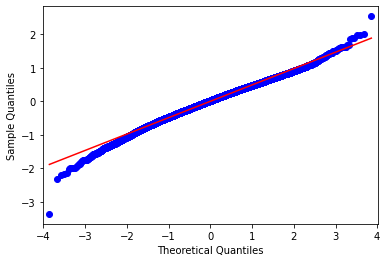

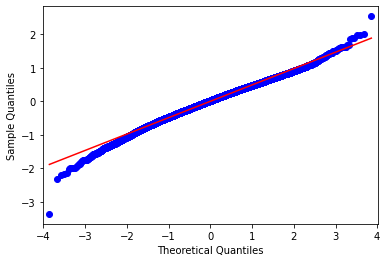

In [25]:
# quick qq plot to make sure everything looks normal
sm.qqplot(est.resid, line='s')

In [26]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    print('R_squared:', linreg.score(X, y))
    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_hat.mean())
    print('Mean Selling Price:', y_test.mean())
    return linreg

In [27]:
lin_reg(X,y)

R_squared: 0.7609949346871829
Mean Absolute Error: 0.38003256380145817
Root Mean Squared Error test: 0.48900230699851377
Root Mean Squared Error train: 0.4892630976256557
Mean Predicted Selling Price: 0.025063885317369167
Mean Selling Price: quant_price    0.030167
dtype: float64


LinearRegression()

In [28]:
#RFE to check for insignificant features 
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

estimator = SVR(kernel="linear")

selector = RFE(estimator, step=1)
selector = selector.fit(X, y)

#Take a look at the R2 with only the most valuable features
X_RFE = X[X.columns[selector.support_]]
lin_reg(X_RFE, y)

R_squared: 0.7079946247492868
Mean Absolute Error: 0.43010003009635545
Root Mean Squared Error test: 0.5399305182313012
Root Mean Squared Error train: 0.5409896103809082
Mean Predicted Selling Price: 0.017297422508718015
Mean Selling Price: quant_price    0.001681
dtype: float64


LinearRegression()

#### Do all grade columns have values?

In [29]:
for x in range(5-13):
    summed = final_data['grade {}'].format(x).sum()
    print('sum of grade ' + str(x) + ' ' + str(summed))

In [30]:
sum_of_grade_5 = sum(final_data['grade_5'])
print('5: '+ str(sum_of_grade_5))
sum_of_grade_6 = sum(final_data['grade_6'])
print('6: ' + str(sum_of_grade_6))
sum_of_grade_7 = sum(final_data['grade_7'])
print('7: ' + str(sum_of_grade_7))
sum_of_grade_8 = sum(final_data['grade_8'])
print('8: ' + str(sum_of_grade_8))
sum_of_grade_9 = sum(final_data['grade_9'])
print('9: ' + str(sum_of_grade_9))
sum_of_grade_10 = sum(final_data['grade_10'])
print('10: ' + str(sum_of_grade_10))
sum_of_grade_11 = sum(final_data['grade_11'])
print('11: ' + str(sum_of_grade_11))
sum_of_grade_12 = sum(final_data['grade_12'])
print('12: ' + str(sum_of_grade_12))
sum_of_grade_13 = sum(final_data['grade_13'])
print('13: ' + str(sum_of_grade_13))

5: 187
6: 1735
7: 7718
8: 4822
9: 1893
10: 794
11: 276
12: 48
13: 6
